In [2]:
import numpy as np
import matplotlib.pyplot as plt
import json
import networkx as nx
import netwulf as nu
import json
from networkx.readwrite import json_graph
import random
import pandas as pd
import ast
from collections import Counter
from IPython import display

## Analyzing Networks through a Random Model

**1. Establishing a Baseline:** We will start by building a Random Network, intended to work as a baseline, to understand the Spotify Network better 

In [6]:
# read the json file containing our network
with open('graph2.json', 'r') as f:
    json_data = json.load(f)

G_SPOTIFY = nx.node_link_graph(json_data)

#get number of nodes and number of edges of CSS network
N = G_SPOTIFY.number_of_nodes()
L = G_SPOTIFY.number_of_edges()

#calculate probability p from formula
p = (2*L)/(N*(N-1))

print("Probability (p) that the expected number of edges in our random network match the actual edge count in the Spotify network:", p)

Probability (p) that the expected number of edges in our random network match the actual edge count in the Spotify network: 0.0005807788035146399


In [3]:
#calculate average degree k

k = p*(N-1)

print("Average degree k of a random network:", k)

Average degree k of a random network: 8.181431005110733


In [4]:
#create function to generate a Random Network 

def generate_random_network(node_count, p, seed=None):
    #set random seed if provided
    if seed is not None:
        np.random.seed(seed)

    #create an empty graph
    G = nx.Graph()

    #add nodes
    G.add_nodes_from(range(node_count))

    #link nodes with probability p
    for i in range(node_count):
        for j in range(i+1, node_count):
            if np.random.uniform() < p:
                G.add_edge(i, j)

    return G


#define nodes and probability 
node_count =  N
p = p

#generate random network
random_network = generate_random_network(node_count, p)


print("Number of nodes in the Random Network:", random_network.number_of_nodes())
print("Number of edges in the Random Network:", random_network.number_of_edges())

Number of nodes in the Random Network: 14088
Number of edges in the Random Network: 57545


In [5]:
#function for visualizing network

def visualize(G):
    a, b = nu.visualize(G)
    return a, b

(<Figure size 480x480 with 1 Axes>, <Axes: >)

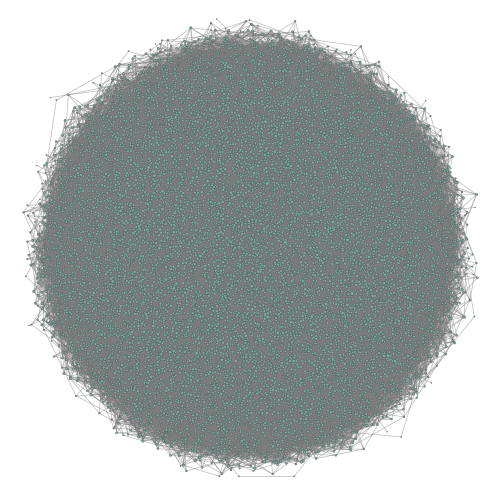

In [6]:

#visualize the plot using netwulf 
nu.draw_netwulf(visualize(random_network)[0])

In [7]:
isolated_nodes = list(nx.isolates(random_network))

print("Isolated Nodes:", isolated_nodes)

Isolated Nodes: [4166, 7756, 8830]


As the random network has a average degree, k, of 8.181, the random network created from the extract of the original spotify network falls within the supercritical regime as $<k> \geq 1$ however it does not satisfy the criteria for it to fall into a connected regime. The network resembles one giant component with almost no isolated nodes - almost meaning that the random network falls within the criteria for a connected regime. 

The original network depicturing Spotify artists, as well as their collaborations with other artists, will be illustrated below, and compared accordingly.

(<Figure size 480x480 with 1 Axes>, <Axes: >)

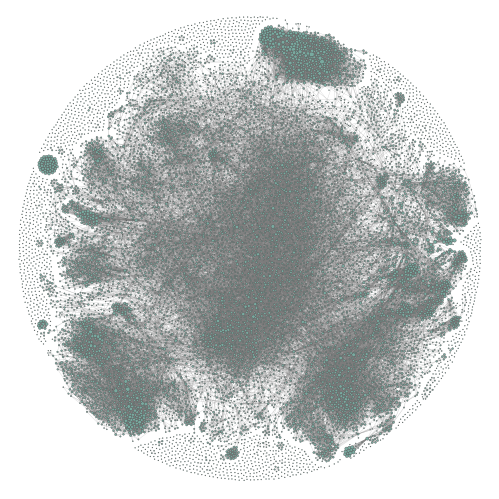

In [8]:
G_SPOTIFY = nx.node_link_graph(json_data)
#remove the "group" attribute from each node because it is not needed for the visualization
for node in G_SPOTIFY.nodes():
    del G_SPOTIFY.nodes[node]["group"]

nu.draw_netwulf(visualize(G_SPOTIFY)[0])

Comparing the Spotify Network with the Random Network, we see a clear difference in how the two networks are clustered. As expected, The Random Network has no indication of clusters, meanwhile the Spotify Network has very distinct clusters throughout the network. These clusters could either represent collaborations within the same music genres, geographical communities or other minor factors.

Moreover, another difference between the two networks is that the Spotify Network has very different size for each node. The size of the nodes is determined by the number of collaborations i.e. the degree of a node, which would suggest that there a few centralized, and infuential, artists in the network. There also seems to be some coherence between clusters and the number of collaborators, highlighting the difference in "collaborating trend" of two different communities or genres.

Contrarily, the size of the nodes in the Random Network would suggests that nodes in the network are mostly centered around the average degree of the network, as the all share a similar size. This follows our expectation of the average degree of the Random Network being centered around $<k>$.

To get a better idea of the Spotify Network and it's clusters, as well as communities, we will plot it under different conditions. First, we have changed the scaling of the nodes to be dependent on the artists' follower count - this will more directly represent the size of the artist compared to the degree of the node for the artist. Secondly, as earlier mentioned, we have made a color mapping that tries to combine different combinations of genres to a few general and representative groups.

(<Figure size 480x480 with 1 Axes>, <Axes: >)

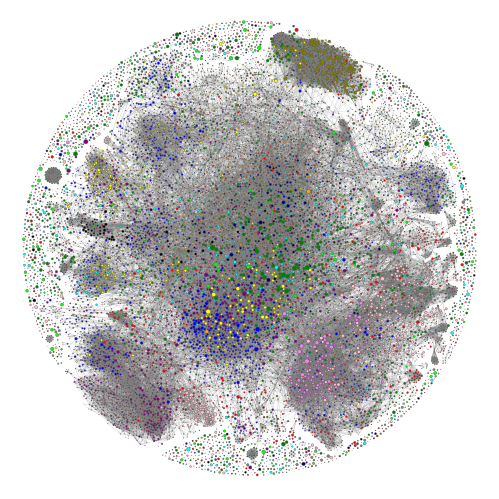

In [9]:
G_SPOTIFY = nx.node_link_graph(json_data)

nu.draw_netwulf(visualize(G_SPOTIFY)[0])

Where the color represents the following groups:

![title](legend.png)

As discussed earlier, we see a clear indication of many collaborations within the same genres of music - especially within the hindi/bollywood, latin and country, as they are all clustered together. This may also be because those genres are more niche and therefore a bit more uncommon compared to the other genres. For example, "pop", "pop, hip hop", "r&b", "electronic" is very centered in the network, and the genres are more intertwined in the network. This could also be a result of artists with many followers collaborating with other artists with a large amount of followers - independent of the genres.

On another note, we see a clear indication of demographical factors in the features of the artists, as many of the latin and hindi artists are collected in clusters. These are the most dominant demographies, but delving more into the network, it could be possible to reveal more clusters that are created mostly because of the nationality of the artist. 

Finally, we can also address that some artists just does not collaborate with other artists. This is clear by the large amount of artists pictured in the outer rims of the network. For example, known artists such as "Adele" and "AC/DC" is within these outer rims. Therefore we also have significant amount of isolated nodes in the network.

**2. Degree Distribution:** This part will analyze the degree distribution of the Spotify Network and compare it with its formerly established baseline.

Text(0, 0.5, 'p(k)')

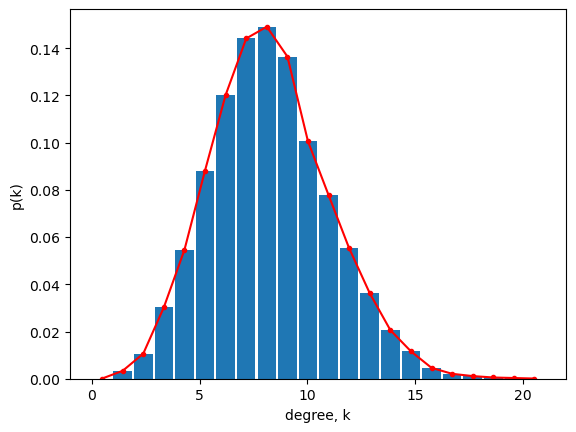

In [9]:
#init random network
G_random = random_network

#construct dict of network
degree_dict = dict(G_random.degree())

#dict values 
degrees = np.array(list(degree_dict.values()))

#compute histogram 
bins = np.linspace(min(degrees),max(degrees),23)
hist, edges = np.histogram(degrees,bins=bins,density=True)
width = bins[1]-bins[0]
x = (edges[1:]+edges[:-1])/2

#plot
fig,ax = plt.subplots()
ax.bar(x,hist,width=width*0.9)
ax.plot(x,hist,marker=".",color="red")
ax.set_xlabel("degree, k")
ax.set_ylabel("p(k)")

From the histogram, we see that the nodes of the random network has a average degree centered around $k = 8.181$.

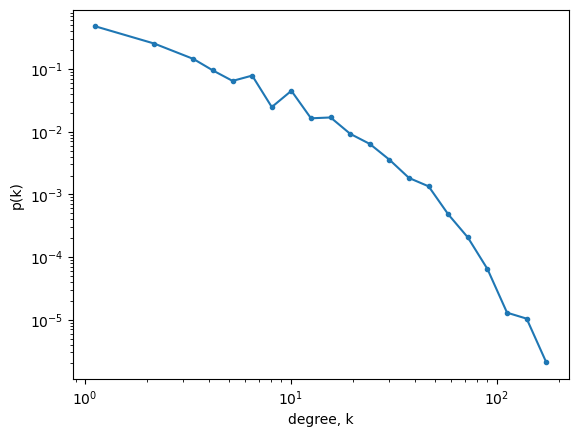

In [10]:
#create dictionary of values 
degree_dict_CSS = dict(G_SPOTIFY.degree())
values = list(degree_dict_CSS.values())

#compute hist with logspace
bins = np.logspace(0,np.log10(max(values)),25)
hist, edges = np.histogram(values,bins=bins, density =True)
x= (edges[1:]+edges[:-1])/2

xx,yy = zip(*[(i,j) for (i,j) in zip(x,hist) if j>0])

#plot and logscale 
fig,ax = plt.subplots()
ax.plot(xx,yy,marker=".")
ax.set_xlabel("degree, k")
ax.set_ylabel("p(k)")
ax.set_xscale("log")
ax.set_yscale("log")

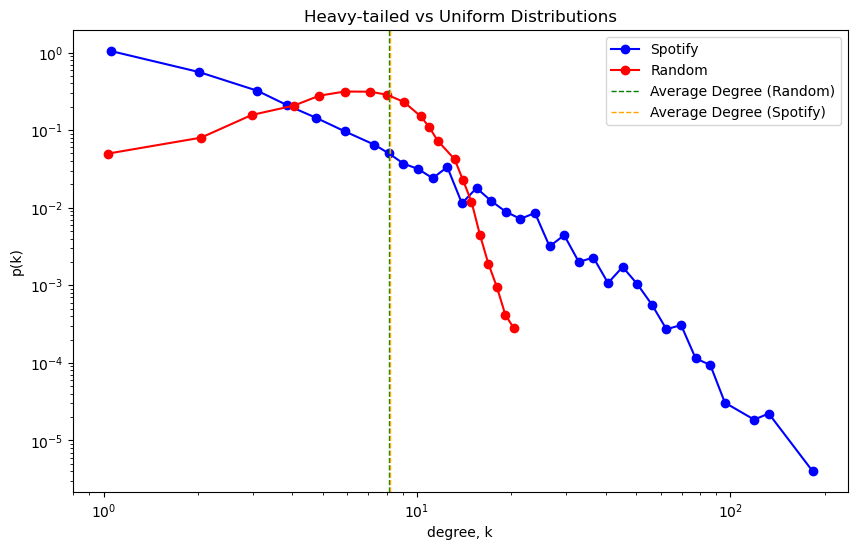

In [13]:
#random (using logspace)
G_random = random_network
degree_dict = dict(G_random.degree())
degrees = np.array(list(degree_dict.values()))
bins_lin = np.logspace(0, np.log10(max(degrees)), 50)
hist_lin, edges_lin = np.histogram(degrees, bins=bins_lin, density=True)
x_lin = (edges_lin[1:] + edges_lin[:-1]) / 2

#Spotify graph  
degree_dict_CSS = dict(G_SPOTIFY.degree())
values = list(degree_dict_CSS.values())
bins_log = np.logspace(0, np.log10(max(values)), 50)
hist_log, edges_log = np.histogram(values, bins=bins_log, density=True)
x_log = (edges_log[1:] + edges_log[:-1]) / 2

xx_log, yy_log = zip(*[(i, j) for (i, j) in zip(x_log, hist_log) if j > 0])
xx_lin, yy_lin = zip(*[(i, j) for (i, j) in zip(x_lin, hist_lin) if j > 0])

#plot
fig, ax = plt.subplots(figsize=(10, 6))

#CSS lineplot
ax.plot(xx_log, yy_log, marker='o', linestyle='-', color='blue', label='Spotify')

#random lineplot 
ax.plot(xx_lin, yy_lin, marker='o', linestyle='-', color='red', label='Random')

#add average degree 
avg_degree_random = np.mean(degrees)
avg_degree_CSS = np.mean(values)

ax.axvline(x=avg_degree_random, color='green', linestyle='--', linewidth=1, label='Average Degree (Random)')
ax.axvline(x=avg_degree_CSS, color='orange', linestyle='--', linewidth=1, label='Average Degree (Spotify)')

# Adding labels and legend
ax.set_title('Heavy-tailed vs Uniform Distributions')
ax.set_xlabel('degree, k')
ax.set_ylabel('p(k)')
ax.set_xscale("log")
ax.set_yscale("log")
ax.legend()

# Show plot
plt.show()

## A Dive into the Network's Assoritivity

In this part of the analysis, we will have a look at the network's Assortivity Coeffecient for different attributes such as degree and followers. This will be put against a configuration model which randomizes the edges between the nodes.

**1. Configuration model:** To analyze the results of the assortivity coeffecients from the original network, we need to establish a configuration model that randomizes the edges in the network, which could show underlying tendencies or correlations of the original network.

In [4]:
def generate_random_network(graph):
    random_graph = graph.copy()
    max_tries = len(random_graph.edges())
    randomized_graph = nx.double_edge_swap(random_graph, nswap=max_tries*10, max_tries=max_tries*11)
    return randomized_graph

In [7]:
random_graph = generate_random_network(G_SPOTIFY)

In [19]:
average_degree_graph = sum(dict(G_SPOTIFY.degree()).values()) / len(G_SPOTIFY)
average_degree_randomized_graph = sum(dict(random_graph.degree()).values()) / len(random_graph)

print("Average Degree of Graph:", average_degree_graph)
print("Average Degree of Randomized Graph:", average_degree_randomized_graph)

Average Degree of Graph: 8.181431005110733
Average Degree of Randomized Graph: 8.181431005110733


The degree of the Spotify Network and the random network is identical, showing us that the algorithm works correctly.

In [8]:
#generate 100 random networks
random_networks = []
for _ in range(10):
    random_network = generate_random_network(G_SPOTIFY)
    random_networks.append(random_network)

**2. "Popularity" Assortivity Coefficient:** We have chosen to use the Popularity attribute, as through multiple iterations it showed more promising results than the Follower attribute. This could be a result of the different ranges of the attributes - "Followers" is unbounded while "Popularity" ranges from 0-1. 

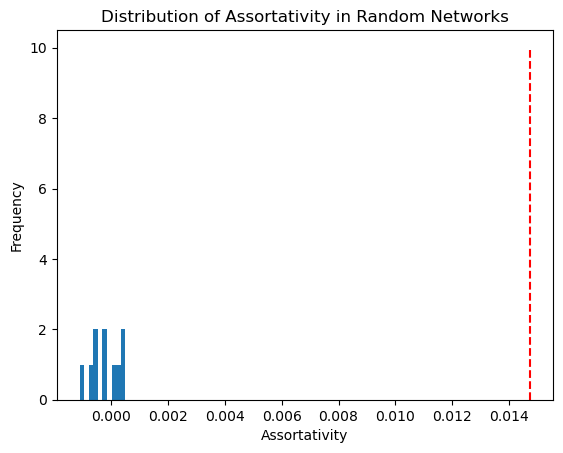

Assortativity of original network: 0.014760978459578364
Mean assortativity of random networks: -0.00022838753968974077
Standard deviation of assortativity in random networks: 0.000489429929217989


In [9]:
#calculate assortativity for each random network
assortativity_values = []
for random_network in random_networks:
    assortativity = nx.attribute_assortativity_coefficient(random_network, 'popularity')
    assortativity_values.append(assortativity)

#compare assortativity of original network with the distribution
original_assortativity = nx.attribute_assortativity_coefficient(G_SPOTIFY, 'popularity')
mean_assortativity = np.mean(assortativity_values)
std_assortativity = np.std(assortativity_values)

#plot the distribution of assortativity values
plt.hist(assortativity_values)
plt.vlines(original_assortativity, 0, 10, linestyles='dashed', color='red', label='Original Assortativity')
plt.xlabel('Assortativity')
plt.ylabel('Frequency')
plt.title('Distribution of Assortativity in Random Networks')
plt.show()

print(f"Assortativity of original network: {original_assortativity}")
print(f"Mean assortativity of random networks: {mean_assortativity}")
print(f"Standard deviation of assortativity in random networks: {std_assortativity}")

As a main part of the project, we wanted to address if the number of features an artist have had any implications in their popularity. In relation to this, we estimate the Attribute Assortativity Coeffecient for "Popularity". This attribute has been explained earlier, but in short, it can be seen as a good indicator for an artists popularity.  

From the figure, we see that the assortivity coeffecients for the random network is centered around 0 with a mean of $r = -0.00023 \pm 0.0004 $. This is significantly lower than the coeffecient for the Spotify Network, and thus we could conclude that the coeffecient for the original network is not solely derived by chance. 

Although the significant difference between the coefficents of the random networks and the original network, the assortivity coeffecient for the original network is not that high and still close to zero. So, it could be argued that the network shows a very small tendency that nodes with high popularity connects with other nodes that also has a high popularity. But, as the value is so close to zero it hard to derive anything definite.



**3. Degree Assortivity Coefficient:** To analyze the collaboration tendencies of artists we will look into rewieving the degree assortivity coeffecient.

In [39]:
degree_assoritivity_spotify = nx.degree_assortativity_coefficient(G_SPOTIFY)
print("Degree Assortativity of Spotify Network:", degree_assoritivity_spotify)

Degree Assortativity of Spotify Network: 0.36802577022902183


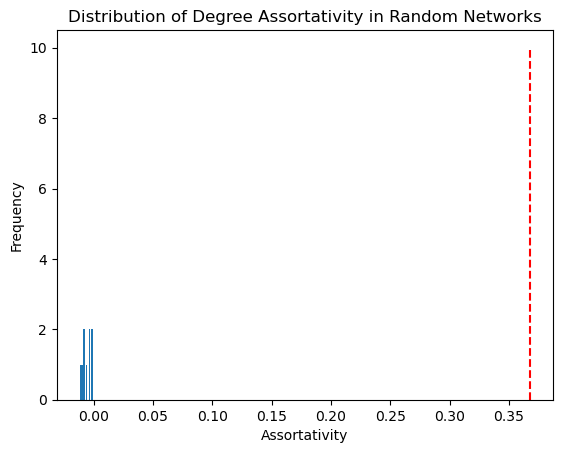

Assortativity of original network: 0.36802577022902183
Mean assortativity of random networks: -0.006232912224027278
Standard deviation of assortativity in random networks: 0.0035656159581066247


In [40]:
#calculate assortativity for each random network
assortativity_values = []
for random_network in random_networks:
    assortativity =  nx.degree_assortativity_coefficient(random_network)
    assortativity_values.append(assortativity)

#compare assortativity of original network with the distribution
mean_assortativity = np.mean(assortativity_values)
std_assortativity = np.std(assortativity_values)

#plot the distribution of assortativity values
plt.hist(assortativity_values)
plt.vlines(degree_assoritivity_spotify, 0, 10, linestyles='dashed', color='red', label='Degree Assortativity of Spotify Network')
plt.xlabel('Assortativity')
plt.ylabel('Frequency')
plt.title('Distribution of Degree Assortativity in Random Networks')
plt.show()

print(f"Assortativity of original network: {degree_assoritivity_spotify}")
print(f"Mean assortativity of random networks: {mean_assortativity}")
print(f"Standard deviation of assortativity in random networks: {std_assortativity}")

Social Networks are in their nature assortative, in our case, this also seems to be the case. The Degree Assortativity Coeffecient for the Spotify Network is $r = 0.37$, which is well within the threshold for an assortative network. Contrarily, the distribution of the Random Networks is centered around $r = 0$, the mean of the distribution is around $r = -0.006 \pm 0.004$. 

In other words, there is a significant difference between the coeffecients of the random networks and the coefficient of the Spotify Network. Leading us to confidently say that the original network is assortative, as we would expect from Social Networks. Because of the significant difference, we could say that the degree assortativity coeffecient is not derived by chance.

Assortative network has high-degree nodes connected with other high-degree nodes, and low-degree nodes connected with other low-degree nodes. In the context of the Spotify Network, this would mean that artists with a lot of features will have tendency to collaborate with other artists that also has many features, and artists with not a lot of features will be more likely to collaborate with other artists that also has few features.

#### Centrality

In [41]:
closeness_centralities = nx.closeness_centrality(G_SPOTIFY)
top_5_closeness = sorted(closeness_centralities.items(), key=lambda x: x[1], reverse=True)[:5]
top_5_closeness_artists_for_cent = [artists for artists, _ in top_5_closeness]

eigenvector_centralities = nx.eigenvector_centrality(G_SPOTIFY)
top_5_closeness = sorted(eigenvector_centralities.items(), key=lambda x: x[1], reverse=True)[:5]
top_5_closeness_artists_for_eig = [artists for artists, _ in top_5_closeness]

In [42]:
print("Top 5 scientists according to closeness centrality:")
for artist in top_5_closeness_artists_for_cent:
    print(artist)

print(" ")

print("Top 5 scientists according to eigenvector centrality:")
for artist in top_5_closeness_artists_for_eig:
    print(artist)

Top 5 scientists according to closeness centrality:
j balvin
david guetta
diplo
sean paul
tiësto
 
Top 5 scientists according to eigenvector centrality:
sukh-e muzical doctorz
preet hundal
goldboy
aman hayer
music mg


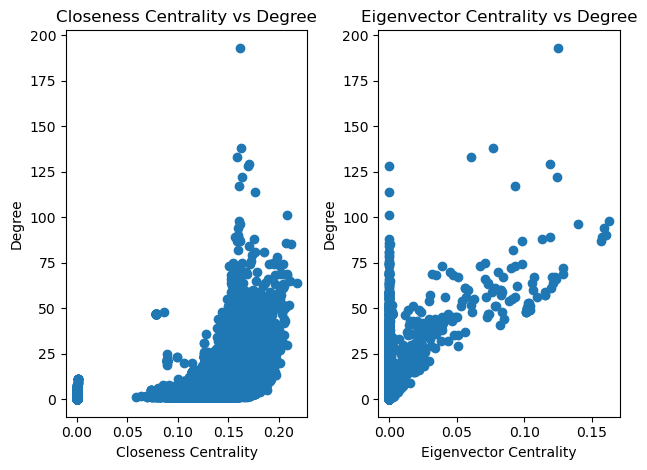

In [43]:
#get the degree and closeness centrality of each node
degrees = dict(G_SPOTIFY.degree())

#create lists to store the degree and closeness centrality values
degree_values = []
closeness_values = []
eigenvector_values = []

#iterate over each node and append its degree and closeness centrality to the lists
for node in G_SPOTIFY.nodes():
    degree_values.append(degrees[node])
    closeness_values.append(closeness_centralities[node])
    eigenvector_values.append(eigenvector_centralities[node])


#plot the closeness centrality of nodes vs their degree
plt.subplot(1,2,1)
plt.scatter(closeness_values, degree_values)
plt.ylabel('Degree')
plt.xlabel('Closeness Centrality')
plt.title('Closeness Centrality vs Degree')

# Plot the eigenvector centrality of nodes vs their degree
plt.subplot(1,2,2)
plt.scatter(eigenvector_values, degree_values)
plt.ylabel('Degree')
plt.xlabel('Eigenvector Centrality')
plt.title('Eigenvector Centrality vs Degree')

plt.tight_layout()
plt.show()


### Communities

In [ ]:
com = nx.community.greedy_modularity_communities(G_SPOTIFY, weight = "weight")

<class 'frozenset'>
<class 'frozenset'>
<class 'frozenset'>
<class 'frozenset'>
<class 'frozenset'>
<class 'frozenset'>
<class 'frozenset'>
<class 'frozenset'>
<class 'frozenset'>
<class 'frozenset'>
<class 'frozenset'>
<class 'frozenset'>
<class 'frozenset'>
<class 'frozenset'>
<class 'frozenset'>
<class 'frozenset'>
<class 'frozenset'>
<class 'frozenset'>
<class 'frozenset'>
<class 'frozenset'>
<class 'frozenset'>
<class 'frozenset'>
<class 'frozenset'>
<class 'frozenset'>
<class 'frozenset'>
<class 'frozenset'>
<class 'frozenset'>
<class 'frozenset'>
<class 'frozenset'>
<class 'frozenset'>
<class 'frozenset'>
<class 'frozenset'>
<class 'frozenset'>
<class 'frozenset'>
<class 'frozenset'>
<class 'frozenset'>
<class 'frozenset'>
<class 'frozenset'>
<class 'frozenset'>
<class 'frozenset'>
<class 'frozenset'>
<class 'frozenset'>
<class 'frozenset'>
<class 'frozenset'>
<class 'frozenset'>
<class 'frozenset'>
<class 'frozenset'>
<class 'frozenset'>
<class 'frozenset'>
<class 'frozenset'>
